# Upper Confidence Bound (UCB)

Reinforcement learning is used in robotics, for example learn and train a dog robot to walk using an algorithm.
We are not going to talk about all the AI stuff in this section but just some topics about it, machine learning problems in reinforcement learning.

## The Multi-Armed Bandit Problem

A one armed bandit is a slot machine (the name come from the handle on the right and these machine are built to make you lose money).

<img src="img/slotMachine.png" width="200" height="400">

The multi armed bandit problem is the kind of enigma a person is faced when it comes up a set of these machines. 

<img src="img/slotMachines.png" width="400" height="200">

How do you play them to maximize your return ?

The assumption is that each of these machines has a distribution of numbers outwith the machine pick result and we don't know this distribution.

<img src="img/slotMachineD.png" width="400" height="200">

The goal is to find the best distribution.

<img src="img/slotMachineDExamples.png" width="400" height="200">

In the example above , the best distribution is given by the D5 machine.

So we need to complete two task, exploration and exploitation : find the best machine and start quickly to use it.

Let's take another example with ads 

<img src="img/ads.png" width="400" height="200">

Which distribution will maximize my return (best number of clicks) ?

We could use an approach by using A/B tests but we will use time and money(because we are doing a random exploration and after the exploitation). by doing that even if we use the best options.

That's this kind of challenge we will try to solve in this section by optimizing exploration and exploitation and using the Upper Confidence bound algorithm.

## Upper Confidence Bound (UCB) intuition

Let's take the example above with the slot machines.

<img src="img/slotMachineD.png" width="400" height="200">

<img src="img/slotMachineDExamples.png" width="400" height="200">

We take the all the returns value (white lines) and put them in a vertical axis.

<img src="img/slotMachineDValuesVetical.png" width="400" height="200">

The algorithm assume for every distribution there is a starting value to compare return values.

<img src="img/slotMachineDValuesVeticalSV.png" width="400" height="200">

The the algotrithm will create a confidence bound which include the actual expected return value and arround the starting value (red line).

<img src="img/slotMachineDValuesVeticalSVBound.png" width="400" height="200">

So next, we are going to play on each machine and the starting value is going to go down or up (sometime) to converge close to the expected return value and on each round the confidence boung will become smaller because of the new observations we add when we are playing. At each round, we are going to chose the machine with the bigger "confidence value" (red line).

<img src="img/slotMachineDValuesVeticalSVBound1.png" width="400" height="200">

<img src="img/slotMachineDValuesVeticalSVBound2.png" width="400" height="200">

<img src="img/slotMachineDValuesVeticalSVBound3.png" width="400" height="200">

<img src="img/slotMachineDValuesVeticalSVBound4.png" width="400" height="200">

<img src="img/slotMachineDValuesVeticalSVBound5.png" width="400" height="200">

We are repeating the task until ou confidence bound is smaller as possible.

<img src="img/slotMachineDValuesVeticalSVBound6.png" width="400" height="200">

### Annexes:


<img src="img/challenge.png" width="600" height="400">

<img src="img/UCB_algo.png" width="600" height="400">



## Practical example

Let's start the practical example and import our dataset.

We are going to try to optimize the "click through rate" using different ads and users actions.

The dataset contains 10 different version of the ad of a company trying to sell low price SUV cars and they want to choose the best ad (which will get the best CTR) to post on a social network.

This dataset is a simulation because in real life we will post ads on social networks and define a strategy : each a time a user will be connected, we show him a version of the ad and if the user click we get a reward 1.

So we have each user on the lines and ads on the columns.

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Let's try a random approach which will select randomly an ad on each round and sea the result.

Total reward : 1249


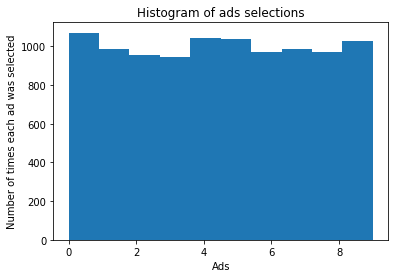

In [9]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

print("Total reward : {}".format(str(total_reward)))

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

The results of the ads seem uniform because the random selection so it's more difficult to chose the best one to optimize our CTR.

Let's try now with the UCB algorithm. There are no current package available so we are going to build one using the detailed step of the UCB.

<img src="img/UCB_algo.png" width="600" height="400">

where __"i"__ is the version of the ad

### Step 1

Declare both variables. 
We need to consider this number for each `Ai` so we create a vector/list which will contain each value.

```python
# vector wich contains only 0
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
```

### Step 2

From the numbers above we need to compute the average reward and the confidence interval in each round.

```python

# For using math library and its sqrt function

import math


# Number of rounds
N = 1000

# Number of ads
d = 10

# For each round
for n in range(0, N):
    #For each Ai
    for i in range(0, d):
        # average reward 
        average_reward = sums_of_rewards[i] / numbers_of_selections[i]

        # confidence interval
        delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])

        upper_bound = average_reward + delta_i
```

### Step 3

We need to select the ad with the best upper bound.
First we need to create a variable to store `selected ad`.
Next we will define and initialize a max upper_bound for each round and assign the max value of each ad.

```python

# For using math library and its sqrt function

import math


# Number of rounds - lines
N = 1000

# Number of ads - columns
d = 10

# selected ads
ads_selected = []

# For each round
for n in range(0, N):
    # to store the index of the ad
    ad = 0
    
    # initializing the max_upper_bound 
    max_upper_bound = 0
    
    #For each Ai
    for i in range(0, d):
        
        # to be sure to have an only one selected ad 
        if (numbers_of_selections[i] > 0):
            # average reward 
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]

            # confidence interval
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            
            upper_bound = average_reward + delta_i
        
        else:
            # putting a big big value to skip the first if and gi directly to the second if
            upper_bound = 1e400
        
        # compare the calculated upper bound with the max and change the value if the calculated upperbound is higher
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    # Update the ads selected vector with the chosen ad
    ads_selected.append(ad)
    
    # Update the vector with the index of the ad and add 1
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    
    # Selecting the reward by using the column and line index in the dataset 
    reward = dataset.values[n, ad]
    
    # Update the sum of rewards on each round
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    
    # Total reward accumulated on each round
    total_reward = total_reward + reward
```

Let's run this code and see the results.

Total reward : 2178


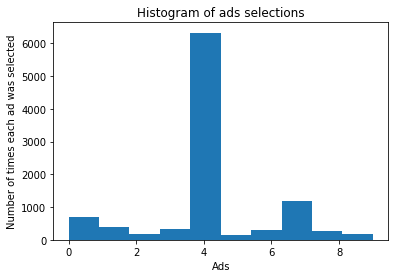

In [12]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

print("Total reward : {}".format(str(total_reward)))

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

We notice we have a better total reward and if we take a look to each ad by ploting each ad result, we see thaht the ad5 (index 4) will optimize our CTR.